In [1]:
%matplotlib notebook

In [2]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation



In [3]:

"""
===========================
The single spring problem
===========================

This animation illustrates the single spring problem.
"""

# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 2.0  # mass of pendulum 2 in kg
k =  0.4 # Spring constant
l0 = 2.0


def my_derivs(state, t):
    # state[0]=x;state[1]=v
    dydx = np.zeros_like(state)
    x1=state[0]
    x2=state[2]
    y1=state[4]
    y2=state[6]
    z1=state[8]
    z2=state[10]
    
    dr=(x1-x2)**2+(y1-y2)**2+(z1-z2)**2
    dr=np.sqrt(dr)
    #print(l0)
    dk=k*(dr-l0)
    #print(t,x1,x2,(dr-l0),dk)
    
    dx=(x1-x2)**2
    dx=np.sqrt(dx)
    dx1=(x1-x2)/dr
    dx2=(x2-x1)/dr
    

    dy=(y1-y2)**2
    dy=np.sqrt(dy)
    dy1=(y1-y2)/dr
    dy2=(y2-y1)/dr
    
    dz=(z1-z2)**2
    dz=np.sqrt(dz)
    dz1=(z1-z2)/dr
    dz2=(z2-z1)/dr
    
    #x1
    dydx[0] = state[1]
    dydx[1] = -dk/M1*dx1
    #x2
    dydx[2] = state[3]
    dydx[3] = -dk/M2*dx2
    #y1
    dydx[4] = state[5]
    dydx[5] = -dk/M1*dy1
    #y2
    dydx[6] = state[7]
    dydx[7] = -dk/M2*dy2
    #z1
    dydx[8] = state[9]
    dydx[9] = -dk/M1*dz1
    #z2
    dydx[10] = state[11]
    dydx[11] = -dk/M2*dz2



    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.04
t = np.arange(0.0, 200, dt)

# initial state x0=1, v0=0
x10 = 1.0
vx10 = 0
x20 = -1.0
vx20 = 0.00
y10 = 0.0
vy10 = 3.0
y20 = 0.0
vy20 = -3.00/2.0
z10 = 0.0
vz10 = 0.0
z20 = 0.0
vz20 = -0.0



# initial state
state = np.array([x10,vx10,x20,vx20,y10,vy10,y20,vy20,z10,vz10,z20,vz20])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(my_derivs, state, t)
#y = integrate.solve_ivp(derivs,[0,20],state)

x1 = y[:,0]
vx1 = y[:,1]
x2 = y[:,2]
vx2 = y[:,3]
y1 = y[:,4]
vy1 = y[:,5]
y2 = y[:,6]
vy2 = y[:,7]
z1 = y[:,8]
vz1 = y[:,9]
z2 = y[:,10]
vz2 = y[:,11]



<IPython.core.display.Javascript object>


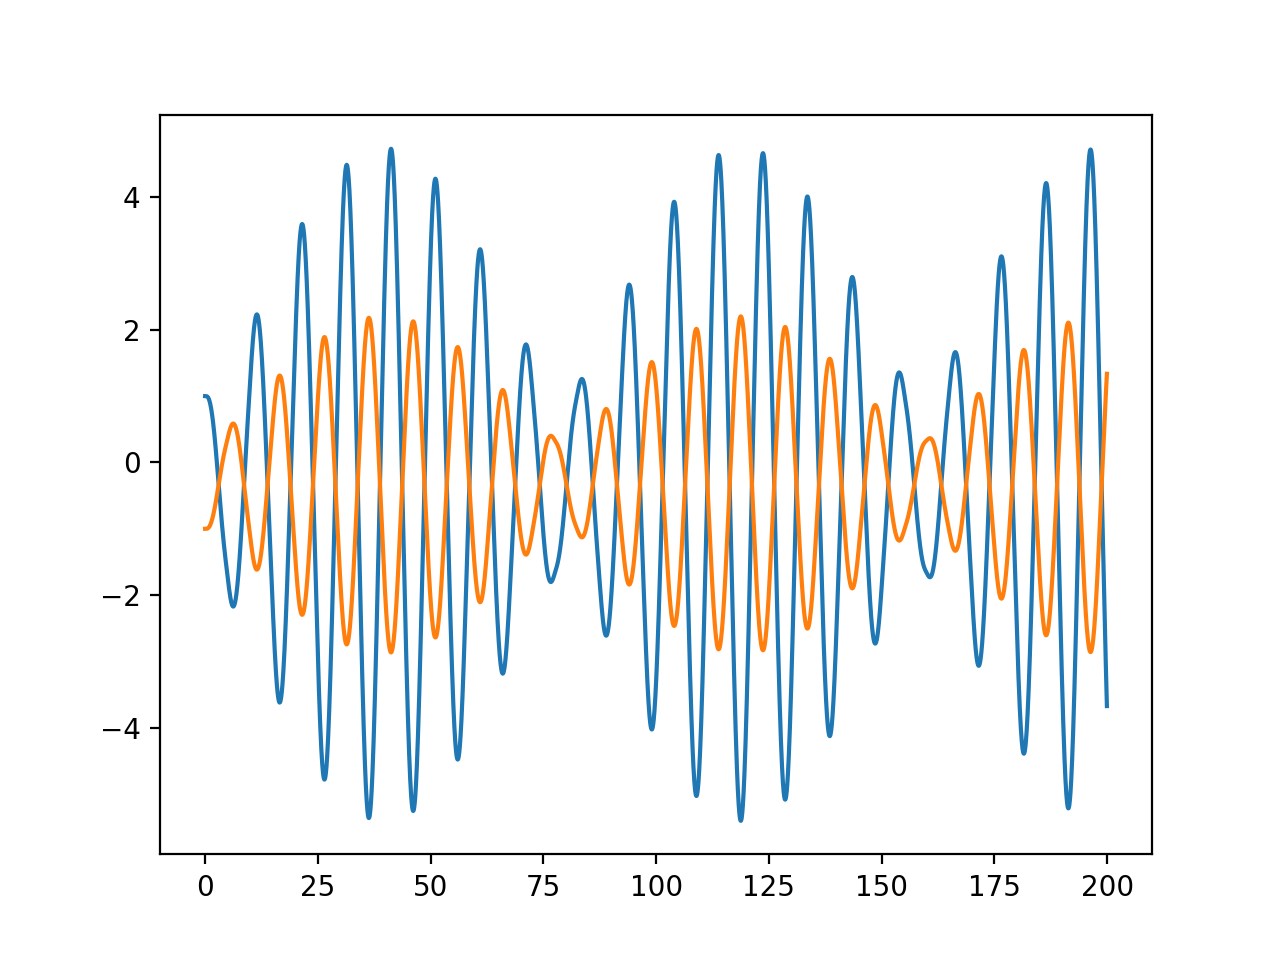

In [4]:
fix, ax = plt.subplots()
ax.plot(t,x1)
ax.plot(t,x2)
#
plt.show()

<IPython.core.display.Javascript object>


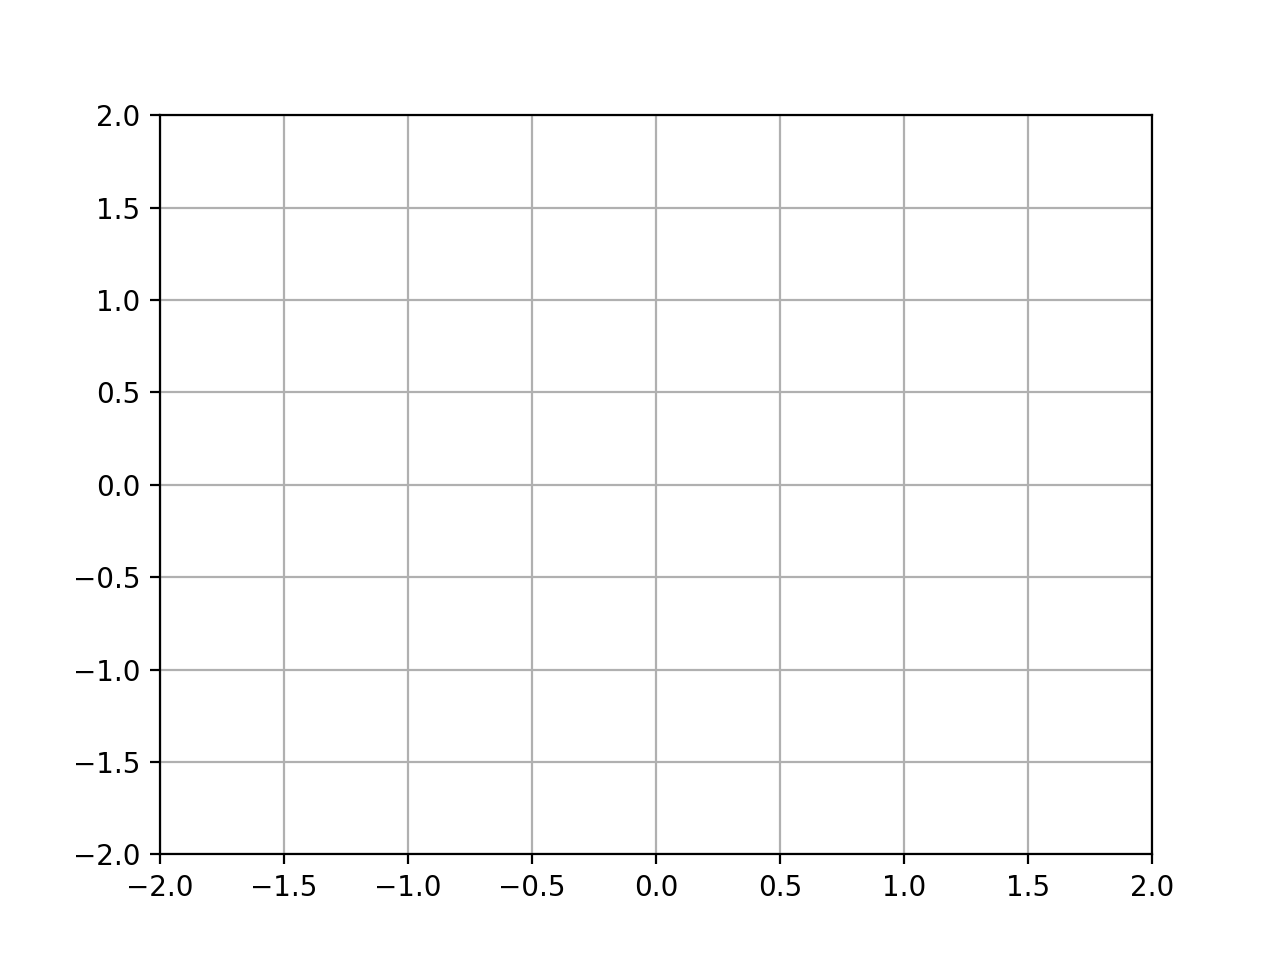

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line1, = ax.plot([], [], 'o--', lw=2)
line2, = ax.plot([], [], 'X:', lw=2)

time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line1.set_data([], [])
    line2.set_data([], [])

    time_text.set_text('')
    return line1,line2, time_text


def animate(i):
    thisx1 = [x1[i-1], x1[i]]
    thisy1 = [y1[i-1], y1[i]]

    thisx2 = [x2[i-1], x2[i]]
    thisy2 = [y2[i-1], y2[i]]

    line1.set_data(thisx1, thisy1)
    line2.set_data(thisx2, thisy2)

    time_text.set_text(time_template % (i*dt))
    return line1, line2

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

#ani.save('single_spring.mp4', fps=100)
plt.show()

<IPython.core.display.Javascript object>


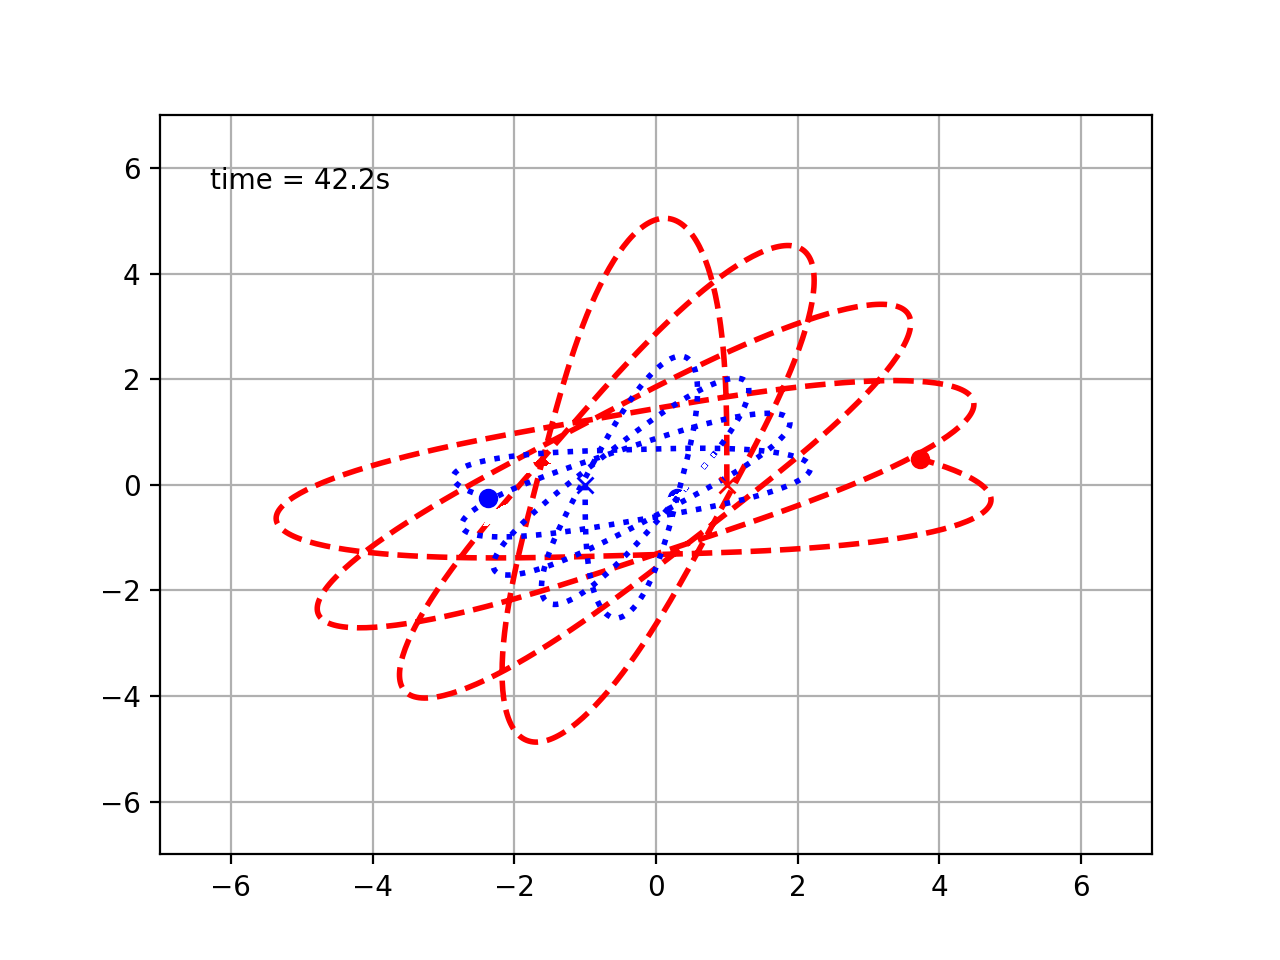

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-7, 7), ylim=(-7, 7))
ax.grid()

line1, = ax.plot([], [], 'r--', lw=2)
line2, = ax.plot([], [], 'b:', lw=2)
marker10, = ax.plot([], [], 'rx', lw=2)
marker11, = ax.plot([], [], 'ro', lw=2)
marker20, = ax.plot([], [], 'bx', lw=2)
marker21, = ax.plot([], [], 'bo', lw=2)




time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line1.set_data([], [])
    line2.set_data([], [])
    marker10.set_data([], [])
    marker11.set_data([], [])
    marker20.set_data([], [])
    marker21.set_data([], [])
    
    time_text.set_text('')
    return line1,line2,marker10,marker11,marker20,marker21, time_text


def animate(i):
    #thisx1 = [x1[0], x1[i]]
    #thisy1 = [y1[0], y1[i]]

    #thisx2 = [x2[0], x2[i]]
    #thisy2 = [y2[0], y2[i]]

    line1.set_data(x1[:i], y1[:i])
    line2.set_data(x2[:i], y2[:i])
    marker10.set_data(x1[0], y1[0])
    marker11.set_data(x1[i], y1[i])
    marker20.set_data(x2[0], y2[0])
    marker21.set_data(x2[i], y2[i])
    time_text.set_text(time_template % (i*dt))
    return line1, line2, marker10,marker11,marker20,marker21,time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=40, blit=True, init_func=init)

ani.save('twomasses_onespring3.mp4', fps=25)
#plt.show()

<IPython.core.display.Javascript object>


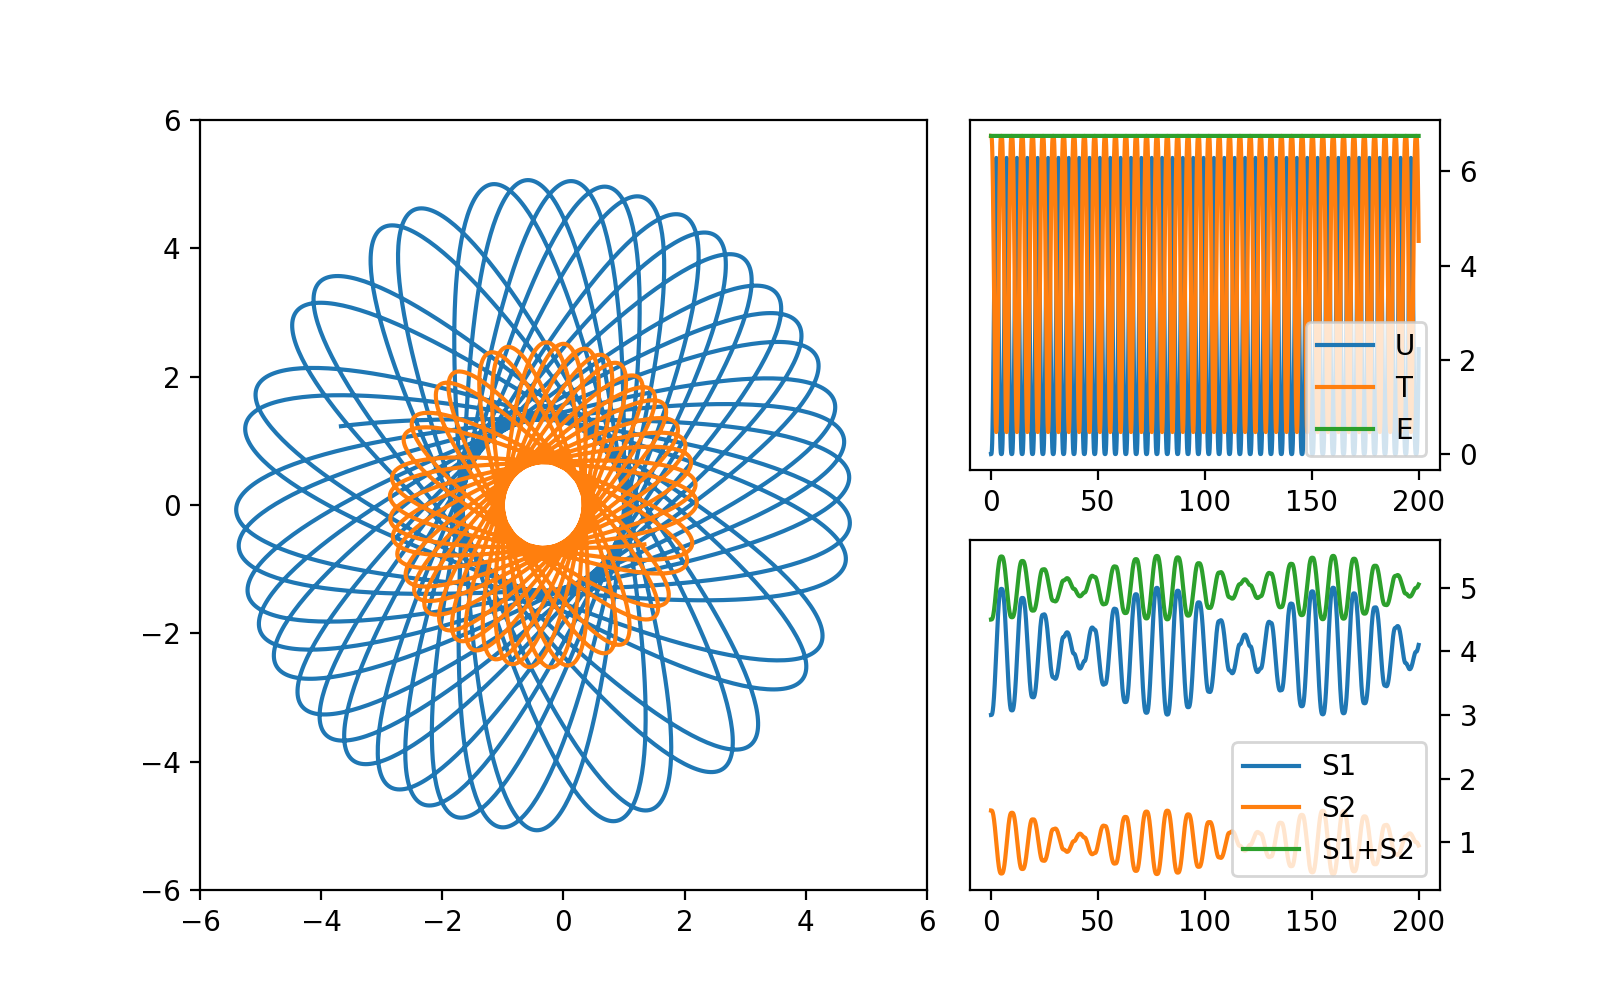

In [10]:
fig=plt.figure(figsize=[8,5])
ax1 = plt.subplot2grid((2,5), (0,0),rowspan=2,colspan=3)
ax2 = plt.subplot2grid((2,5), (0,3),colspan=2)
ax3 = plt.subplot2grid((2,5), (1,3),colspan=2)


ax1.plot(x1,y1,label='M1')
ax1.plot(x2,y2,label='M2')
ax1.set_ylim(-6,6)
ax1.set_xlim(-6,6)

dr=(x2-x1)**2+(y2-y1)**2+(z2-z1)**2
dr=np.sqrt(dr)
pote=k*(dr-l0)**2/2.0
kine=M1/2.0*(vx1**2+vy1**2)+M2/2.0*(vx2**2+vy2**2)
ax2.plot(t,pote,label="U")
ax2.plot(t,kine,label="T")
ax2.plot(t,pote+kine,label="E")
ax2.yaxis.set_ticks_position('right')
ax2.legend(loc='lower right')

lx1=z1*vy1-y1*vz1
ly1=z1*vx1-x1*vz1
lz1=x1*vy1-y1*vx1
lx2=z2*vy2-y2*vz2
ly2=z2*vx2-x2*vz2
lz2=x2*vy2-y2*vx2

#ax3.plot(t,lz1,label='S1')
#ax3.plot(t,lz2,':',label='S2')
ltot1=np.sqrt(lz1**2+ly1**2+lx1**1)
ltot2=np.sqrt(lz2**2+ly2**2+lx2**2)
ltot=np.sqrt((lz1+lz2)**2+(ly1+ly2)**2+(lx1+lx2)**2)
ax3.plot(t,ltot1,label='S1')
ax3.plot(t,ltot2,label='S2')
ax3.plot(t,ltot,label='S1+S2')

#ax3.set_ylim(-0.1,1.1)
ax3.yaxis.set_ticks_position('right')
ax3.legend(loc='lower right')

plt.show()

<IPython.core.display.Javascript object>


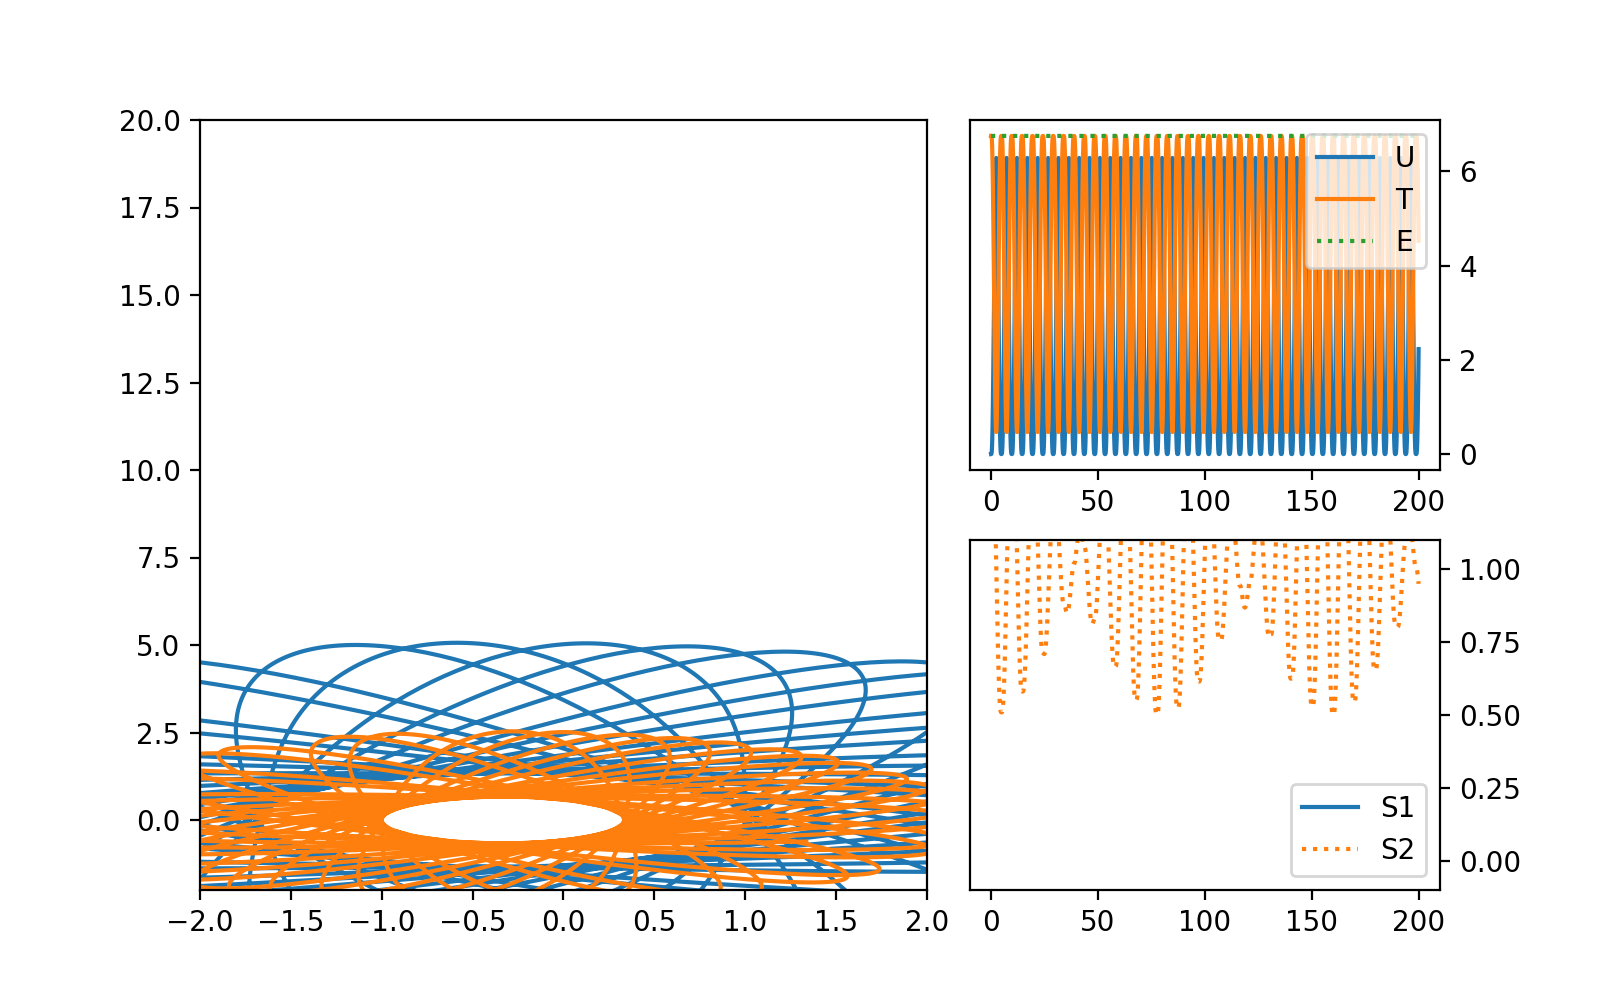

In [11]:
fig=plt.figure(figsize=[8,5])
ax1 = plt.subplot2grid((2,5), (0,0),rowspan=2,colspan=3)
ax2 = plt.subplot2grid((2,5), (0,3),colspan=2)
ax3 = plt.subplot2grid((2,5), (1,3),colspan=2)


ax1.plot(x1,y1,label='M1')
ax1.plot(x2,y2,label='M2')
ax1.set_ylim(-2,20)
ax1.set_xlim(-2,2)

dr=(x2-x1)**2+(y2-y1)**2+(z2-z1)**2
dr=np.sqrt(dr)
pote=k*(dr-l0)**2/2.0
kine=M1/2.0*(vx1**2+vy1**2)+M2/2.0*(vx2**2+vy2**2)
ax2.plot(t,pote,label="U")
ax2.plot(t,kine,label="T")
ax2.plot(t,pote+kine,':',label="E")
ax2.yaxis.set_ticks_position('right')
ax2.legend(loc='upper right')

lx1=z1*vy1-y1*vz1
ly1=z1*vx1-x1*vz1
lz1=x1*vy1-y1*vx1
lx2=z2*vy2-y2*vz2
ly2=z2*vx2-x2*vz2
lz2=x2*vy2-y2*vx2

ax3.plot(t,lz1,label='S1')
ax3.plot(t,lz2,':',label='S2')
ax3.set_ylim(-0.1,1.1)
ax3.yaxis.set_ticks_position('right')
ax3.legend(loc='lower right')

plt.show()

<IPython.core.display.Javascript object>


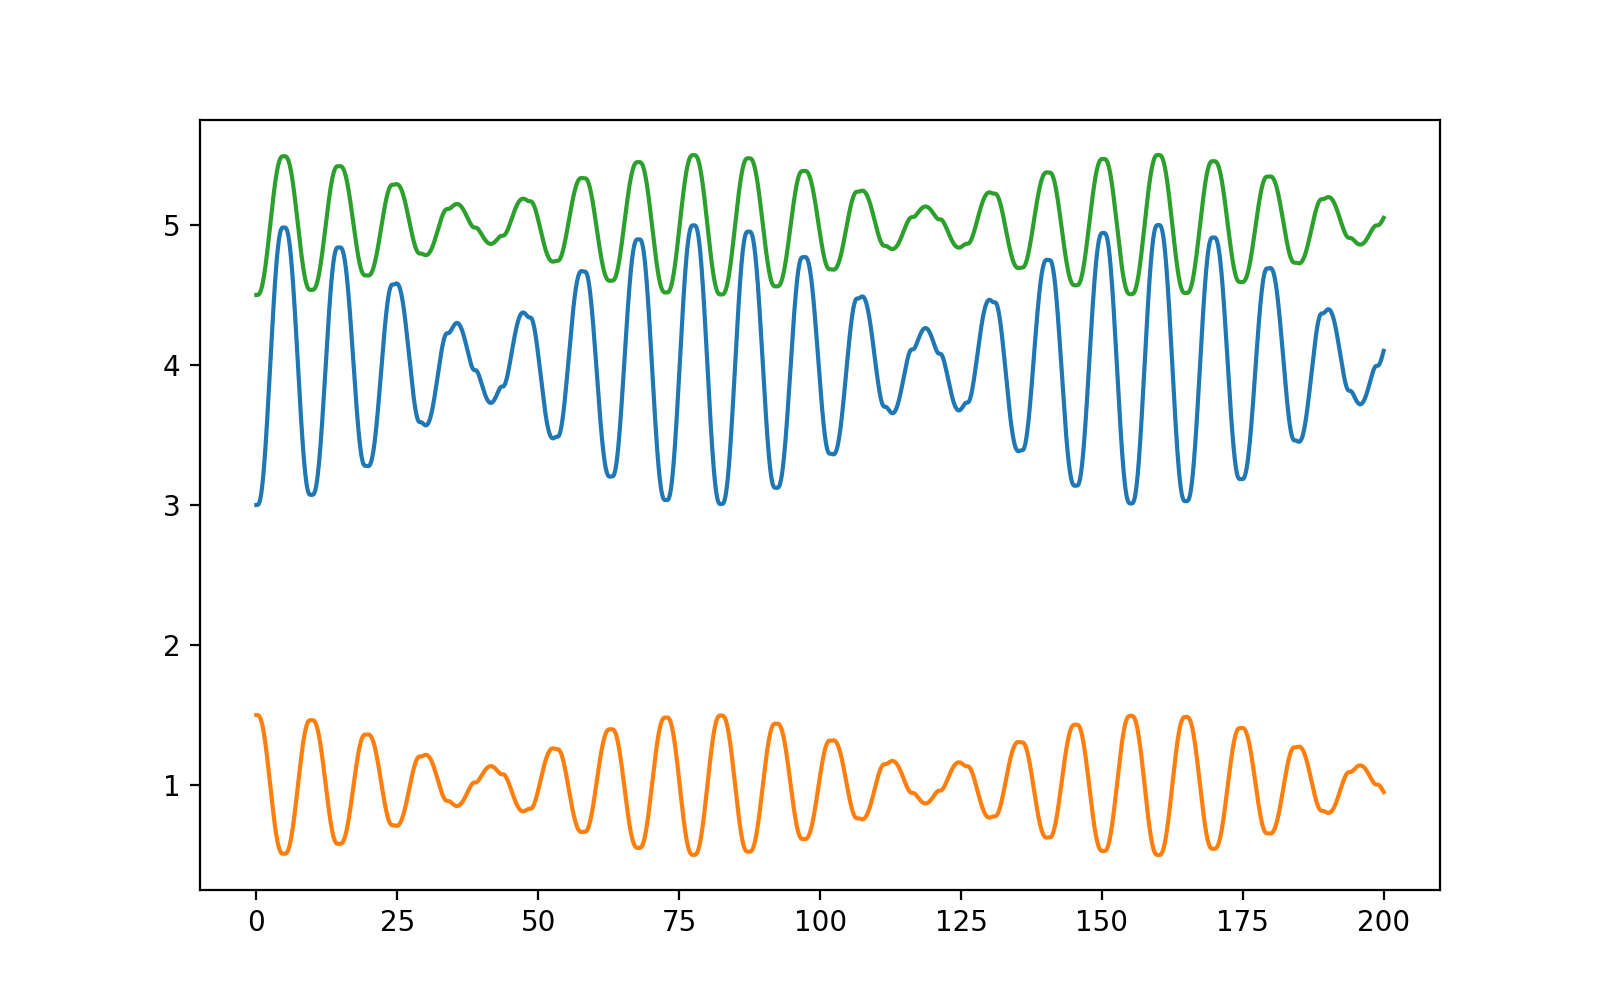

In [12]:
fig=plt.figure(figsize=[8,5])
plt.plot(t,lz1)
plt.plot(t,lz2)
plt.plot(t,lz1+lz2)
plt.show()